In [15]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [16]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [17]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [18]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    N = y.shape[0]
    #dyf = y - tx.dot(w)
    #mse = np.sum(dyf*dyf)/(2*N)
    dyf = y - tx.dot(w)
    mae = np.sum(np.fabs(dyf))/N
    
    #raise NotImplementedError
    #return mse
    return mae

# 2 Grid Search

Fill in the function `grid_search()` below:

In [19]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    for i in range(losses.shape[0]):
        for j in range(losses.shape[1]):
            losses[i][j] = compute_loss(y,tx,np.array([w0[i],w1[j]]))
            
    #raise NotImplementedError
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=7.5885150157040915, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.010 seconds


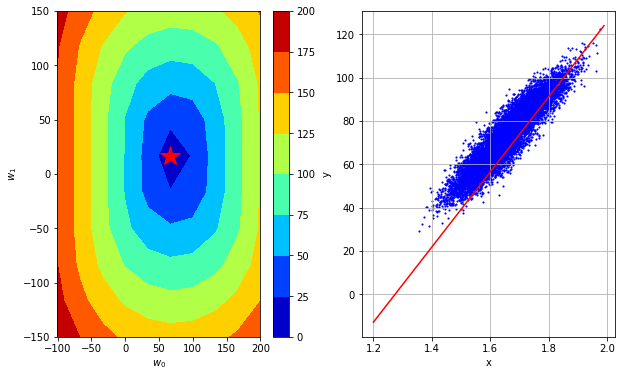

In [20]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [38]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = y - tx.dot(w)
    N = e.shape[0]
    result = -1*np.dot(np.transpose(tx),np.sign(e))/N
    return result
    #raise NotImplementedError

Please fill in the functions `gradient_descent` below:

In [39]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        grad = compute_gradient(y,tx,w)
        N = y.shape[0]
        e = y - tx.dot(w)
        loss = ((np.transpose(e)).dot(e))/(2*N)
        # ***************************************************
        w = w - gamma*grad
        # ***************************************************
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [56]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 10000
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/9999): loss=2792.236712759167, w0=0.7, w1=-1.846274244599044e-15
Gradient Descent(1/9999): loss=2741.175967357693, w0=1.4, w1=-3.692548489198088e-15
Gradient Descent(2/9999): loss=2690.60522195622, w0=2.0999999999999996, w1=-5.538822733797132e-15
Gradient Descent(3/9999): loss=2640.524476554746, w0=2.8, w1=-7.385096978396176e-15
Gradient Descent(4/9999): loss=2590.933731153272, w0=3.5, w1=-9.231371222995221e-15
Gradient Descent(5/9999): loss=2541.832985751799, w0=4.2, w1=-1.1077645467594266e-14
Gradient Descent(6/9999): loss=2493.2222403503256, w0=4.9, w1=-1.292391971219331e-14
Gradient Descent(7/9999): loss=2445.101494948852, w0=5.6000000000000005, w1=-1.4770193956792355e-14
Gradient Descent(8/9999): loss=2397.470749547378, w0=6.300000000000001, w1=-1.66164682013914e-14
Gradient Descent(9/9999): loss=2350.3300041459047, w0=7.000000000000001, w1=-1.8462742445990445e-14
Gradient Descent(10/9999): loss=2303.679258744431, w0=7.700000000000001, w1=-2.030901669058949e-14


Gradient Descent(362/9999): loss=15.388242112072962, w0=73.24085999999998, w1=13.523185878209437
Gradient Descent(363/9999): loss=15.388240626995827, w0=73.24085999999998, w1=13.523151731060882
Gradient Descent(364/9999): loss=15.388239143084714, w0=73.24085999999998, w1=13.523117583912326
Gradient Descent(365/9999): loss=15.388237660339628, w0=73.24085999999998, w1=13.52308343676377
Gradient Descent(366/9999): loss=15.388236178760577, w0=73.24099999999999, w1=13.523306346389633
Gradient Descent(367/9999): loss=15.388238452538411, w0=73.24099999999999, w1=13.523272199241077
Gradient Descent(368/9999): loss=15.38823696451366, w0=73.24099999999999, w1=13.523238052092521
Gradient Descent(369/9999): loss=15.388235477654932, w0=73.24099999999999, w1=13.523203904943966
Gradient Descent(370/9999): loss=15.38823399196223, w0=73.24099999999999, w1=13.52316975779541
Gradient Descent(371/9999): loss=15.38823250743556, w0=73.24099999999999, w1=13.523135610646854
Gradient Descent(372/9999): loss=15

Gradient Descent(730/9999): loss=15.388186912499002, w0=73.24155999999999, w1=13.522763181651802
Gradient Descent(731/9999): loss=15.38818544185574, w0=73.24155999999999, w1=13.522729034503246
Gradient Descent(732/9999): loss=15.388183972378515, w0=73.24155999999999, w1=13.52269488735469
Gradient Descent(733/9999): loss=15.388182504067316, w0=73.2417, w1=13.522917796980554
Gradient Descent(734/9999): loss=15.388184789233748, w0=73.24155999999999, w1=13.522905007679087
Gradient Descent(735/9999): loss=15.388191557629424, w0=73.24155999999999, w1=13.522870860530531
Gradient Descent(736/9999): loss=15.388190083309246, w0=73.24155999999999, w1=13.522836713381976
Gradient Descent(737/9999): loss=15.388188610155085, w0=73.24155999999999, w1=13.52280256623342
Gradient Descent(738/9999): loss=15.388187138166963, w0=73.24155999999999, w1=13.522768419084864
Gradient Descent(739/9999): loss=15.388185667344864, w0=73.24155999999999, w1=13.522734271936308
Gradient Descent(740/9999): loss=15.3881841

Gradient Descent(1082/9999): loss=15.388184846971921, w0=73.24155999999999, w1=13.522715214084998
Gradient Descent(1083/9999): loss=15.38818337796662, w0=73.2417, w1=13.522938123710862
Gradient Descent(1084/9999): loss=15.388185667664077, w0=73.24155999999999, w1=13.522925334409395
Gradient Descent(1085/9999): loss=15.38819243579979, w0=73.24155999999999, w1=13.52289118726084
Gradient Descent(1086/9999): loss=15.388190960785508, w0=73.24155999999999, w1=13.522857040112283
Gradient Descent(1087/9999): loss=15.388189486937254, w0=73.24155999999999, w1=13.522822892963728
Gradient Descent(1088/9999): loss=15.388188014255027, w0=73.24155999999999, w1=13.522788745815172
Gradient Descent(1089/9999): loss=15.38818654273883, w0=73.24155999999999, w1=13.522754598666616
Gradient Descent(1090/9999): loss=15.388185072388657, w0=73.24155999999999, w1=13.52272045151806
Gradient Descent(1091/9999): loss=15.388183603204514, w0=73.24155999999999, w1=13.522686304369504
Gradient Descent(1092/9999): loss=1

Gradient Descent(1402/9999): loss=15.38818564073458, w0=73.24155999999999, w1=13.522924711407457
Gradient Descent(1403/9999): loss=15.388192408878263, w0=73.24155999999999, w1=13.522890564258901
Gradient Descent(1404/9999): loss=15.388190933885257, w0=73.24155999999999, w1=13.522856417110345
Gradient Descent(1405/9999): loss=15.388189460058275, w0=73.24155999999999, w1=13.52282226996179
Gradient Descent(1406/9999): loss=15.388187987397323, w0=73.24155999999999, w1=13.522788122813234
Gradient Descent(1407/9999): loss=15.388186515902396, w0=73.24155999999999, w1=13.522753975664678
Gradient Descent(1408/9999): loss=15.388185045573499, w0=73.24155999999999, w1=13.522719828516122
Gradient Descent(1409/9999): loss=15.388183576410627, w0=73.24155999999999, w1=13.522685681367566
Gradient Descent(1410/9999): loss=15.388182108413787, w0=73.2417, w1=13.52290859099343
Gradient Descent(1411/9999): loss=15.388184391528116, w0=73.24155999999999, w1=13.522895801691963
Gradient Descent(1412/9999): loss

Gradient Descent(1711/9999): loss=15.38818309918183, w0=73.2417, w1=13.522931640273924
Gradient Descent(1712/9999): loss=15.388185387434065, w0=73.24155999999999, w1=13.522918850972458
Gradient Descent(1713/9999): loss=15.388192155652696, w0=73.24155999999999, w1=13.522884703823902
Gradient Descent(1714/9999): loss=15.388190680859802, w0=73.24155999999999, w1=13.522850556675346
Gradient Descent(1715/9999): loss=15.38818920723294, w0=73.24155999999999, w1=13.52281640952679
Gradient Descent(1716/9999): loss=15.388187734772108, w0=73.24155999999999, w1=13.522782262378234
Gradient Descent(1717/9999): loss=15.388186263477301, w0=73.24155999999999, w1=13.522748115229678
Gradient Descent(1718/9999): loss=15.388184793348517, w0=73.24155999999999, w1=13.522713968081122
Gradient Descent(1719/9999): loss=15.388183324385766, w0=73.2417, w1=13.522936877706986
Gradient Descent(1720/9999): loss=15.388185613805474, w0=73.24155999999999, w1=13.522924088405519
Gradient Descent(1721/9999): loss=15.388192

Gradient Descent(2042/9999): loss=15.388187933683076, w0=73.24155999999999, w1=13.522786876809358
Gradient Descent(2043/9999): loss=15.388186462230697, w0=73.24155999999999, w1=13.522752729660802
Gradient Descent(2044/9999): loss=15.388184991944348, w0=73.24155999999999, w1=13.522718582512246
Gradient Descent(2045/9999): loss=15.388183522824026, w0=73.24155999999999, w1=13.52268443536369
Gradient Descent(2046/9999): loss=15.388182054869732, w0=73.2417, w1=13.522907344989553
Gradient Descent(2047/9999): loss=15.388184337706313, w0=73.24155999999999, w1=13.522894555688087
Gradient Descent(2048/9999): loss=15.388191106235666, w0=73.24155999999999, w1=13.52286040853953
Gradient Descent(2049/9999): loss=15.388189632272388, w0=73.24155999999999, w1=13.522826261390975
Gradient Descent(2050/9999): loss=15.38818815947514, w0=73.24155999999999, w1=13.522792114242419
Gradient Descent(2051/9999): loss=15.388186687843922, w0=73.24155999999999, w1=13.522757967093863
Gradient Descent(2052/9999): loss

Gradient Descent(2348/9999): loss=15.388185333583545, w0=73.24155999999999, w1=13.522917604968582
Gradient Descent(2349/9999): loss=15.388192101818113, w0=73.24155999999999, w1=13.522883457820026
Gradient Descent(2350/9999): loss=15.388190627067768, w0=73.24155999999999, w1=13.52284931067147
Gradient Descent(2351/9999): loss=15.388189153483452, w0=73.24155999999999, w1=13.522815163522914
Gradient Descent(2352/9999): loss=15.388187681065165, w0=73.24155999999999, w1=13.522781016374358
Gradient Descent(2353/9999): loss=15.388186209812906, w0=73.24155999999999, w1=13.522746869225802
Gradient Descent(2354/9999): loss=15.388184739726672, w0=73.24155999999999, w1=13.522712722077246
Gradient Descent(2355/9999): loss=15.388183270806465, w0=73.2417, w1=13.52293563170311
Gradient Descent(2356/9999): loss=15.388185559948429, w0=73.24155999999999, w1=13.522922842401643
Gradient Descent(2357/9999): loss=15.388192328116013, w0=73.24155999999999, w1=13.522888695253087
Gradient Descent(2358/9999): los

Gradient Descent(2677/9999): loss=15.38818935254624, w0=73.24155999999999, w1=13.522819777954037
Gradient Descent(2678/9999): loss=15.388187879970385, w0=73.24155999999999, w1=13.522785630805481
Gradient Descent(2679/9999): loss=15.388186408560554, w0=73.24155999999999, w1=13.522751483656926
Gradient Descent(2680/9999): loss=15.388184938316751, w0=73.24155999999999, w1=13.52271733650837
Gradient Descent(2681/9999): loss=15.388183469238976, w0=73.2417, w1=13.522940246134233
Gradient Descent(2682/9999): loss=15.38818575940954, w0=73.24155999999999, w1=13.522927456832766
Gradient Descent(2683/9999): loss=15.38819252751811, w0=73.24155999999999, w1=13.52289330968421
Gradient Descent(2684/9999): loss=15.38819105243135, w0=73.24155999999999, w1=13.522859162535655
Gradient Descent(2685/9999): loss=15.38818957851062, w0=73.24155999999999, w1=13.522825015387099
Gradient Descent(2686/9999): loss=15.388188105755923, w0=73.24155999999999, w1=13.522790868238543
Gradient Descent(2687/9999): loss=15.

Gradient Descent(3028/9999): loss=15.388188756408304, w0=73.24155999999999, w1=13.52280595753579
Gradient Descent(3029/9999): loss=15.388187284304376, w0=73.24155999999999, w1=13.522771810387233
Gradient Descent(3030/9999): loss=15.388185813366476, w0=73.24155999999999, w1=13.522737663238678
Gradient Descent(3031/9999): loss=15.3881843435946, w0=73.24155999999999, w1=13.522703516090122
Gradient Descent(3032/9999): loss=15.388182874988752, w0=73.2417, w1=13.522926425715985
Gradient Descent(3033/9999): loss=15.388185162078612, w0=73.24155999999999, w1=13.522913636414518
Gradient Descent(3034/9999): loss=15.388191930363933, w0=73.24155999999999, w1=13.522879489265963
Gradient Descent(3035/9999): loss=15.388190455749104, w0=73.24155999999999, w1=13.522845342117407
Gradient Descent(3036/9999): loss=15.388188982300303, w0=73.24155999999999, w1=13.52281119496885
Gradient Descent(3037/9999): loss=15.388187510017532, w0=73.24155999999999, w1=13.522777047820295
Gradient Descent(3038/9999): loss=

Gradient Descent(3394/9999): loss=15.388190085283751, w0=73.24155999999999, w1=13.52283675913222
Gradient Descent(3395/9999): loss=15.388188612128035, w0=73.24155999999999, w1=13.522802611983664
Gradient Descent(3396/9999): loss=15.388187140138346, w0=73.24155999999999, w1=13.522768464835108
Gradient Descent(3397/9999): loss=15.388185669314684, w0=73.24155999999999, w1=13.522734317686552
Gradient Descent(3398/9999): loss=15.388184199657053, w0=73.24155999999999, w1=13.522700170537997
Gradient Descent(3399/9999): loss=15.388182731165443, w0=73.2417, w1=13.52292308016386
Gradient Descent(3400/9999): loss=15.38818501750955, w0=73.24155999999999, w1=13.522910290862393
Gradient Descent(3401/9999): loss=15.388191785837657, w0=73.24155999999999, w1=13.522876143713837
Gradient Descent(3402/9999): loss=15.38819031133707, w0=73.24155999999999, w1=13.522841996565282
Gradient Descent(3403/9999): loss=15.388188838002511, w0=73.24155999999999, w1=13.522807849416726
Gradient Descent(3404/9999): loss=

Gradient Descent(3718/9999): loss=15.388184990589432, w0=73.24155999999999, w1=13.522909667860455
Gradient Descent(3719/9999): loss=15.388191758925503, w0=73.24155999999999, w1=13.5228755207119
Gradient Descent(3720/9999): loss=15.38819028444619, w0=73.24155999999999, w1=13.522841373563343
Gradient Descent(3721/9999): loss=15.388188811132906, w0=73.24155999999999, w1=13.522807226414788
Gradient Descent(3722/9999): loss=15.388187338985649, w0=73.24155999999999, w1=13.522773079266232
Gradient Descent(3723/9999): loss=15.388185868004413, w0=73.24155999999999, w1=13.522738932117676
Gradient Descent(3724/9999): loss=15.388184398189214, w0=73.24155999999999, w1=13.52270478496912
Gradient Descent(3725/9999): loss=15.388182929540035, w0=73.2417, w1=13.522927694594983
Gradient Descent(3726/9999): loss=15.38818521691274, w0=73.24155999999999, w1=13.522914905293517
Gradient Descent(3727/9999): loss=15.38819198518184, w0=73.24155999999999, w1=13.52288075814496
Gradient Descent(3728/9999): loss=15.

Gradient Descent(4028/9999): loss=15.388184737377076, w0=73.24155999999999, w1=13.522903807425456
Gradient Descent(4029/9999): loss=15.388191505788104, w0=73.24155999999999, w1=13.5228696602769
Gradient Descent(4030/9999): loss=15.388190031508904, w0=73.24155999999999, w1=13.522835513128344
Gradient Descent(4031/9999): loss=15.38818855839574, w0=73.24155999999999, w1=13.522801365979788
Gradient Descent(4032/9999): loss=15.388187086448594, w0=73.24155999999999, w1=13.522767218831232
Gradient Descent(4033/9999): loss=15.38818561566748, w0=73.24155999999999, w1=13.522733071682676
Gradient Descent(4034/9999): loss=15.388184146052396, w0=73.24155999999999, w1=13.52269892453412
Gradient Descent(4035/9999): loss=15.388182677603336, w0=73.2417, w1=13.522921834159984
Gradient Descent(4036/9999): loss=15.388184963669694, w0=73.24155999999999, w1=13.522909044858517
Gradient Descent(4037/9999): loss=15.388191732013738, w0=73.24155999999999, w1=13.522874897709961
Gradient Descent(4038/9999): loss=1

Gradient Descent(4332/9999): loss=15.388189552617295, w0=73.24155999999999, w1=13.522824415260283
Gradient Descent(4333/9999): loss=15.388188079883085, w0=73.24155999999999, w1=13.522790268111727
Gradient Descent(4334/9999): loss=15.388186608314903, w0=73.24155999999999, w1=13.522756120963171
Gradient Descent(4335/9999): loss=15.388185137912753, w0=73.24155999999999, w1=13.522721973814615
Gradient Descent(4336/9999): loss=15.388183668676625, w0=73.24155999999999, w1=13.52268782666606
Gradient Descent(4337/9999): loss=15.388182200606527, w0=73.2417, w1=13.522910736291923
Gradient Descent(4338/9999): loss=15.388184484199066, w0=73.24155999999999, w1=13.522897946990456
Gradient Descent(4339/9999): loss=15.388191252685042, w0=73.24155999999999, w1=13.5228637998419
Gradient Descent(4340/9999): loss=15.388189778605964, w0=73.24155999999999, w1=13.522829652693344
Gradient Descent(4341/9999): loss=15.38818830569291, w0=73.24155999999999, w1=13.522795505544789
Gradient Descent(4342/9999): loss=

Gradient Descent(4649/9999): loss=15.388190999616333, w0=73.24155999999999, w1=13.5228579394069
Gradient Descent(4650/9999): loss=15.388189525737369, w0=73.24155999999999, w1=13.522823792258345
Gradient Descent(4651/9999): loss=15.388188053024432, w0=73.24155999999999, w1=13.522789645109789
Gradient Descent(4652/9999): loss=15.388186581477523, w0=73.24155999999999, w1=13.522755497961233
Gradient Descent(4653/9999): loss=15.388185111096647, w0=73.24155999999999, w1=13.522721350812677
Gradient Descent(4654/9999): loss=15.388183641881792, w0=73.24155999999999, w1=13.522687203664121
Gradient Descent(4655/9999): loss=15.388182173832972, w0=73.2417, w1=13.522910113289985
Gradient Descent(4656/9999): loss=15.38818445728663, w0=73.24155999999999, w1=13.522897323988518
Gradient Descent(4657/9999): loss=15.38819122578058, w0=73.24155999999999, w1=13.522863176839962
Gradient Descent(4658/9999): loss=15.388189751722773, w0=73.24155999999999, w1=13.522829029691406
Gradient Descent(4659/9999): loss=

Gradient Descent(4954/9999): loss=15.388186103473911, w0=73.24155999999999, w1=13.522744400093172
Gradient Descent(4955/9999): loss=15.388184633471994, w0=73.24155999999999, w1=13.522710252944616
Gradient Descent(4956/9999): loss=15.388183164636102, w0=73.2417, w1=13.52293316257048
Gradient Descent(4957/9999): loss=15.388185453227669, w0=73.24155999999999, w1=13.522920373269013
Gradient Descent(4958/9999): loss=15.388192221426838, w0=73.24155999999999, w1=13.522886226120457
Gradient Descent(4959/9999): loss=15.388190746581962, w0=73.24155999999999, w1=13.522852078971901
Gradient Descent(4960/9999): loss=15.388189272903116, w0=73.24155999999999, w1=13.522817931823345
Gradient Descent(4961/9999): loss=15.3881878003903, w0=73.24155999999999, w1=13.52278378467479
Gradient Descent(4962/9999): loss=15.388186329043508, w0=73.24155999999999, w1=13.522749637526234
Gradient Descent(4963/9999): loss=15.388184858862747, w0=73.24155999999999, w1=13.522715490377678
Gradient Descent(4964/9999): loss=

Gradient Descent(5266/9999): loss=15.388182912667357, w0=73.2417, w1=13.52292730213548
Gradient Descent(5267/9999): loss=15.388185199952582, w0=73.24155999999999, w1=13.522914512834014
Gradient Descent(5268/9999): loss=15.388191968226693, w0=73.24155999999999, w1=13.522880365685458
Gradient Descent(5269/9999): loss=15.38819049358194, w0=73.24155999999999, w1=13.522846218536902
Gradient Descent(5270/9999): loss=15.38818902010321, w0=73.24155999999999, w1=13.522812071388346
Gradient Descent(5271/9999): loss=15.38818754779051, w0=73.24155999999999, w1=13.52277792423979
Gradient Descent(5272/9999): loss=15.388186076643834, w0=73.24155999999999, w1=13.522743777091234
Gradient Descent(5273/9999): loss=15.38818460666319, w0=73.24155999999999, w1=13.522709629942678
Gradient Descent(5274/9999): loss=15.388183137848575, w0=73.2417, w1=13.522932539568542
Gradient Descent(5275/9999): loss=15.38818542630127, w0=73.24155999999999, w1=13.522919750267075
Gradient Descent(5276/9999): loss=15.3881921945

Gradient Descent(5577/9999): loss=15.388184946711833, w0=73.24155999999999, w1=13.522908652399014
Gradient Descent(5578/9999): loss=15.388191715060897, w0=73.24155999999999, w1=13.522874505250458
Gradient Descent(5579/9999): loss=15.388190240616257, w0=73.24155999999999, w1=13.522840358101902
Gradient Descent(5580/9999): loss=15.388188767337647, w0=73.24155999999999, w1=13.522806210953346
Gradient Descent(5581/9999): loss=15.388187295225062, w0=73.24155999999999, w1=13.52277206380479
Gradient Descent(5582/9999): loss=15.388185824278509, w0=73.24155999999999, w1=13.522737916656235
Gradient Descent(5583/9999): loss=15.388184354497978, w0=73.24155999999999, w1=13.522703769507679
Gradient Descent(5584/9999): loss=15.38818288588348, w0=73.2417, w1=13.522926679133542
Gradient Descent(5585/9999): loss=15.388185173029825, w0=73.24155999999999, w1=13.522913889832076
Gradient Descent(5586/9999): loss=15.38819194131191, w0=73.24155999999999, w1=13.52287974268352
Gradient Descent(5587/9999): loss=

Gradient Descent(5927/9999): loss=15.388182066742619, w0=73.2417, w1=13.522907621282233
Gradient Descent(5928/9999): loss=15.38818434964079, w0=73.24155999999999, w1=13.522894831980766
Gradient Descent(5929/9999): loss=15.388191118166608, w0=73.24155999999999, w1=13.52286068483221
Gradient Descent(5930/9999): loss=15.388189644193893, w0=73.24155999999999, w1=13.522826537683654
Gradient Descent(5931/9999): loss=15.388188171387213, w0=73.24155999999999, w1=13.522792390535098
Gradient Descent(5932/9999): loss=15.388186699746555, w0=73.24155999999999, w1=13.522758243386543
Gradient Descent(5933/9999): loss=15.38818522927193, w0=73.24155999999999, w1=13.522724096237987
Gradient Descent(5934/9999): loss=15.388183759963326, w0=73.24155999999999, w1=13.52268994908943
Gradient Descent(5935/9999): loss=15.388182291820756, w0=73.2417, w1=13.522912858715294
Gradient Descent(5936/9999): loss=15.388184575886402, w0=73.24155999999999, w1=13.522900069413827
Gradient Descent(5937/9999): loss=15.3881913

Gradient Descent(6283/9999): loss=15.388186104459056, w0=73.24155999999999, w1=13.522744422968294
Gradient Descent(6284/9999): loss=15.388184634456353, w0=73.24155999999999, w1=13.522710275819739
Gradient Descent(6285/9999): loss=15.388183165619685, w0=73.2417, w1=13.522933185445602
Gradient Descent(6286/9999): loss=15.38818545421635, w0=73.24155999999999, w1=13.522920396144135
Gradient Descent(6287/9999): loss=15.388192222415222, w0=73.24155999999999, w1=13.52288624899558
Gradient Descent(6288/9999): loss=15.388190747569565, w0=73.24155999999999, w1=13.522852101847024
Gradient Descent(6289/9999): loss=15.388189273889939, w0=73.24155999999999, w1=13.522817954698468
Gradient Descent(6290/9999): loss=15.38818780137634, w0=73.24155999999999, w1=13.522783807549912
Gradient Descent(6291/9999): loss=15.388186330028772, w0=73.24155999999999, w1=13.522749660401356
Gradient Descent(6292/9999): loss=15.388184859847225, w0=73.24155999999999, w1=13.5227155132528
Gradient Descent(6293/9999): loss=1

Gradient Descent(6601/9999): loss=15.388186077628962, w0=73.24155999999999, w1=13.522743799966356
Gradient Descent(6602/9999): loss=15.38818460764754, w0=73.24155999999999, w1=13.5227096528178
Gradient Descent(6603/9999): loss=15.388183138832138, w0=73.2417, w1=13.522932562443664
Gradient Descent(6604/9999): loss=15.388185427289933, w0=73.24155999999999, w1=13.522919773142197
Gradient Descent(6605/9999): loss=15.388192195496773, w0=73.24155999999999, w1=13.522885625993641
Gradient Descent(6606/9999): loss=15.388190720672393, w0=73.24155999999999, w1=13.522851478845086
Gradient Descent(6607/9999): loss=15.388189247014042, w0=73.24155999999999, w1=13.52281733169653
Gradient Descent(6608/9999): loss=15.388187774521713, w0=73.24155999999999, w1=13.522783184547974
Gradient Descent(6609/9999): loss=15.388186303195415, w0=73.24155999999999, w1=13.522749037399418
Gradient Descent(6610/9999): loss=15.388184833035147, w0=73.24155999999999, w1=13.522714890250862
Gradient Descent(6611/9999): loss=

Gradient Descent(6953/9999): loss=15.388184013031577, w0=73.24155999999999, w1=13.522695832399553
Gradient Descent(6954/9999): loss=15.388182544688108, w0=73.2417, w1=13.522918742025416
Gradient Descent(6955/9999): loss=15.3881848300652, w0=73.24155999999999, w1=13.52290595272395
Gradient Descent(6956/9999): loss=15.388191598448788, w0=73.24155999999999, w1=13.522871805575393
Gradient Descent(6957/9999): loss=15.388190124096337, w0=73.24155999999999, w1=13.522837658426837
Gradient Descent(6958/9999): loss=15.38818865090991, w0=73.24155999999999, w1=13.522803511278282
Gradient Descent(6959/9999): loss=15.388187178889517, w0=73.24155999999999, w1=13.522769364129726
Gradient Descent(6960/9999): loss=15.388185708035145, w0=73.24155999999999, w1=13.52273521698117
Gradient Descent(6961/9999): loss=15.388184238346803, w0=73.24155999999999, w1=13.522701069832614
Gradient Descent(6962/9999): loss=15.388182769824489, w0=73.2417, w1=13.522923979458477
Gradient Descent(6963/9999): loss=15.38818505

Gradient Descent(7266/9999): loss=15.388191345333162, w0=73.24155999999999, w1=13.522865945140394
Gradient Descent(7267/9999): loss=15.388189871180822, w0=73.24155999999999, w1=13.522831797991838
Gradient Descent(7268/9999): loss=15.388188398194513, w0=73.24155999999999, w1=13.522797650843282
Gradient Descent(7269/9999): loss=15.388186926374235, w0=73.24155999999999, w1=13.522763503694726
Gradient Descent(7270/9999): loss=15.38818545571998, w0=73.24155999999999, w1=13.52272935654617
Gradient Descent(7271/9999): loss=15.38818398623176, w0=73.24155999999999, w1=13.522695209397614
Gradient Descent(7272/9999): loss=15.388182517909561, w0=73.2417, w1=13.522918119023478
Gradient Descent(7273/9999): loss=15.388184803147777, w0=73.24155999999999, w1=13.522905329722011
Gradient Descent(7274/9999): loss=15.388191571539338, w0=73.24155999999999, w1=13.522871182573455
Gradient Descent(7275/9999): loss=15.388190097208158, w0=73.24155999999999, w1=13.5228370354249
Gradient Descent(7276/9999): loss=1

Gradient Descent(7580/9999): loss=15.388185203439166, w0=73.24155999999999, w1=13.52272349611117
Gradient Descent(7581/9999): loss=15.388183734151058, w0=73.24155999999999, w1=13.522689348962615
Gradient Descent(7582/9999): loss=15.388182266028982, w0=73.2417, w1=13.522912258588478
Gradient Descent(7583/9999): loss=15.38818454996085, w0=73.24155999999999, w1=13.522899469287012
Gradient Descent(7584/9999): loss=15.388191318427362, w0=73.24155999999999, w1=13.522865322138456
Gradient Descent(7585/9999): loss=15.3881898442963, w0=73.24155999999999, w1=13.5228311749899
Gradient Descent(7586/9999): loss=15.388188371331262, w0=73.24155999999999, w1=13.522797027841344
Gradient Descent(7587/9999): loss=15.388186899532256, w0=73.24155999999999, w1=13.522762880692788
Gradient Descent(7588/9999): loss=15.388185428899277, w0=73.24155999999999, w1=13.522728733544232
Gradient Descent(7589/9999): loss=15.388183959432327, w0=73.24155999999999, w1=13.522694586395676
Gradient Descent(7590/9999): loss=15

Gradient Descent(7905/9999): loss=15.388186872690666, w0=73.24155999999999, w1=13.52276225769085
Gradient Descent(7906/9999): loss=15.388185402078962, w0=73.24155999999999, w1=13.522728110542294
Gradient Descent(7907/9999): loss=15.388183932633284, w0=73.24155999999999, w1=13.522693963393738
Gradient Descent(7908/9999): loss=15.388182464353635, w0=73.2417, w1=13.522916873019602
Gradient Descent(7909/9999): loss=15.388184749314105, w0=73.24155999999999, w1=13.522904083718135
Gradient Descent(7910/9999): loss=15.3881915177216, w0=73.24155999999999, w1=13.52286993656958
Gradient Descent(7911/9999): loss=15.388190043432969, w0=73.24155999999999, w1=13.522835789421023
Gradient Descent(7912/9999): loss=15.388188570310367, w0=73.24155999999999, w1=13.522801642272468
Gradient Descent(7913/9999): loss=15.388187098353788, w0=73.24155999999999, w1=13.522767495123912
Gradient Descent(7914/9999): loss=15.388185627563239, w0=73.24155999999999, w1=13.522733347975356
Gradient Descent(7915/9999): loss=

Gradient Descent(8223/9999): loss=15.388186845849463, w0=73.24155999999999, w1=13.522761634688912
Gradient Descent(8224/9999): loss=15.388185375259031, w0=73.24155999999999, w1=13.522727487540356
Gradient Descent(8225/9999): loss=15.388183905834628, w0=73.24155999999999, w1=13.5226933403918
Gradient Descent(8226/9999): loss=15.388182437576255, w0=73.2417, w1=13.522916250017664
Gradient Descent(8227/9999): loss=15.388184722397853, w0=73.24155999999999, w1=13.522903460716197
Gradient Descent(8228/9999): loss=15.388191490813313, w0=73.24155999999999, w1=13.522869313567641
Gradient Descent(8229/9999): loss=15.388190016545956, w0=73.24155999999999, w1=13.522835166419085
Gradient Descent(8230/9999): loss=15.388188543444627, w0=73.24155999999999, w1=13.52280101927053
Gradient Descent(8231/9999): loss=15.388187071509321, w0=73.24155999999999, w1=13.522766872121974
Gradient Descent(8232/9999): loss=15.38818560074005, w0=73.24155999999999, w1=13.522732724973418
Gradient Descent(8233/9999): loss=

Gradient Descent(8512/9999): loss=15.388185265739581, w0=73.24155999999999, w1=13.522916035130569
Gradient Descent(8513/9999): loss=15.388192033994226, w0=73.24155999999999, w1=13.522881887982013
Gradient Descent(8514/9999): loss=15.388190559297486, w0=73.24155999999999, w1=13.522847740833457
Gradient Descent(8515/9999): loss=15.388189085766777, w0=73.24155999999999, w1=13.522813593684901
Gradient Descent(8516/9999): loss=15.388187613402097, w0=73.24155999999999, w1=13.522779446536346
Gradient Descent(8517/9999): loss=15.38818614220344, w0=73.24155999999999, w1=13.52274529938779
Gradient Descent(8518/9999): loss=15.388184672170814, w0=73.24155999999999, w1=13.522711152239234
Gradient Descent(8519/9999): loss=15.388183203304216, w0=73.2417, w1=13.522934061865097
Gradient Descent(8520/9999): loss=15.388185492096245, w0=73.24155999999999, w1=13.52292127256363
Gradient Descent(8521/9999): loss=15.388192260283907, w0=73.24155999999999, w1=13.522887125415075
Gradient Descent(8522/9999): loss

Gradient Descent(8817/9999): loss=15.388188607118424, w0=73.24155999999999, w1=13.52280249581684
Gradient Descent(8818/9999): loss=15.388187135132705, w0=73.24155999999999, w1=13.522768348668285
Gradient Descent(8819/9999): loss=15.38818566431301, w0=73.24155999999999, w1=13.522734201519729
Gradient Descent(8820/9999): loss=15.388184194659344, w0=73.24155999999999, w1=13.522700054371173
Gradient Descent(8821/9999): loss=15.388182726171703, w0=73.2417, w1=13.522922963997036
Gradient Descent(8822/9999): loss=15.388185012489918, w0=73.24155999999999, w1=13.52291017469557
Gradient Descent(8823/9999): loss=15.388191780819506, w0=73.24155999999999, w1=13.522876027547014
Gradient Descent(8824/9999): loss=15.388190306322889, w0=73.24155999999999, w1=13.522841880398458
Gradient Descent(8825/9999): loss=15.388188832992292, w0=73.24155999999999, w1=13.522807733249902
Gradient Descent(8826/9999): loss=15.388187360827729, w0=73.24155999999999, w1=13.522773586101346
Gradient Descent(8827/9999): loss

Gradient Descent(9138/9999): loss=15.388184167856892, w0=73.24155999999999, w1=13.522699431369235
Gradient Descent(9139/9999): loss=15.388182699390526, w0=73.2417, w1=13.522922340995098
Gradient Descent(9140/9999): loss=15.388184985569865, w0=73.24155999999999, w1=13.522909551693632
Gradient Descent(9141/9999): loss=15.38819175390743, w0=73.24155999999999, w1=13.522875404545076
Gradient Descent(9142/9999): loss=15.38819027943208, w0=73.24155999999999, w1=13.52284125739652
Gradient Descent(9143/9999): loss=15.38818880612276, w0=73.24155999999999, w1=13.522807110247964
Gradient Descent(9144/9999): loss=15.388187333979467, w0=73.24155999999999, w1=13.522772963099408
Gradient Descent(9145/9999): loss=15.388185863002207, w0=73.24155999999999, w1=13.522738815950852
Gradient Descent(9146/9999): loss=15.388184393190969, w0=73.24155999999999, w1=13.522704668802296
Gradient Descent(9147/9999): loss=15.38818292454576, w0=73.2417, w1=13.52292757842816
Gradient Descent(9148/9999): loss=15.388185211

Gradient Descent(9474/9999): loss=15.38818541131652, w0=73.24155999999999, w1=13.522919403557816
Gradient Descent(9475/9999): loss=15.388192179528083, w0=73.24155999999999, w1=13.52288525640926
Gradient Descent(9476/9999): loss=15.388190704716322, w0=73.24155999999999, w1=13.522851109260705
Gradient Descent(9477/9999): loss=15.38818923107059, w0=73.24155999999999, w1=13.522816962112149
Gradient Descent(9478/9999): loss=15.388187758590883, w0=73.24155999999999, w1=13.522782814963593
Gradient Descent(9479/9999): loss=15.38818628727721, w0=73.24155999999999, w1=13.522748667815037
Gradient Descent(9480/9999): loss=15.38818481712956, w0=73.24155999999999, w1=13.522714520666481
Gradient Descent(9481/9999): loss=15.388183348147939, w0=73.2417, w1=13.522937430292345
Gradient Descent(9482/9999): loss=15.388185637690823, w0=73.24155999999999, w1=13.522924640990878
Gradient Descent(9483/9999): loss=15.388192405835403, w0=73.24155999999999, w1=13.522890493842322
Gradient Descent(9484/9999): loss=1

Gradient Descent(9836/9999): loss=15.38818886084882, w0=73.24155999999999, w1=13.522808379126962
Gradient Descent(9837/9999): loss=15.388187388662203, w0=73.24155999999999, w1=13.522774231978406
Gradient Descent(9838/9999): loss=15.388185917641609, w0=73.24155999999999, w1=13.52274008482985
Gradient Descent(9839/9999): loss=15.388184447787044, w0=73.24155999999999, w1=13.522705937681295
Gradient Descent(9840/9999): loss=15.388182979098504, w0=73.2417, w1=13.522928847307158
Gradient Descent(9841/9999): loss=15.388185266728163, w0=73.24155999999999, w1=13.522916058005691
Gradient Descent(9842/9999): loss=15.388192034982517, w0=73.24155999999999, w1=13.522881910857135
Gradient Descent(9843/9999): loss=15.388190560284997, w0=73.24155999999999, w1=13.52284776370858
Gradient Descent(9844/9999): loss=15.388189086753503, w0=73.24155999999999, w1=13.522813616560024
Gradient Descent(9845/9999): loss=15.388187614388043, w0=73.24155999999999, w1=13.522779469411468
Gradient Descent(9846/9999): loss

In [57]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=10001, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 4 Stochastic gradient descent

In [58]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    e = y - tx.dot(w)
    N = e.shape[0]
    result = -1*np.dot(np.transpose(tx),np.sign(e))/N
    return result
    #raise NotImplementedError
    
def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    ws = [initial_w]
    w = initial_w
    losses = []
    for _ in range(max_iters):
        
        for minibatch_y, minibatch_x in batch_iter(y,tx,32):
            ### Compute Loss ###
            e = minibatch_y - minibatch_x.dot(w)
            N = minibatch_y.shape[0]
            loss = ((np.transpose(e)).dot(e))/(2*N)

            ### Compute w ###
            gradient = compute_stoch_gradient(minibatch_y,minibatch_x,w)
            w = w - gamma*gradient

            ws.append(w)
            losses.append(loss)
    
    
    # ***************************************************
    #raise NotImplementedError
    return losses, ws

In [59]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 10000
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD: execution time=4.981 seconds


In [60]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=10001, min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.plot_figure>

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)